In [43]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 53s 5us/step


In [3]:
print(len(X_train))

60000


In [4]:
print(len(X_test))

10000


In [5]:
X_train[0].shape

(28, 28)

In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

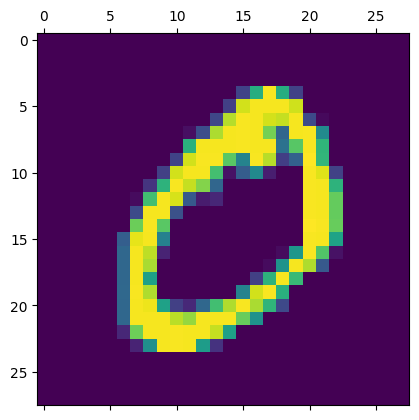

In [8]:
plt.matshow(X_train[1])

In [11]:
y_train[0]

5

In [12]:
X_train.shape

(60000, 28, 28)

In [14]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [29]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)
X_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
X_train_flattened.shape

(60000, 784)

In [30]:
X_test_flattened.shape

(10000, 784)

In [16]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [45]:
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8751 - loss: 0.4535
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 985us/step - accuracy: 0.9601 - loss: 0.1360
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 910us/step - accuracy: 0.9741 - loss: 0.0898
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - accuracy: 0.9806 - loss: 0.0670
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 903us/step - accuracy: 0.9849 - loss: 0.0518
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - accuracy: 0.9886 - loss: 0.0391
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - accuracy: 0.9909 - loss: 0.0295
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - accuracy: 0.9925 - loss: 0.0254
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.9934 - loss: 0.0213
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 903us/step - accuracy: 0.9950 - loss: 0.0172
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 940us/step - accuracy: 0.9961 - loss: 0.0152
Epoch 12/1

In [46]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.9742 - loss: 0.1063


[0.09262369573116302, 0.9768999814987183]

In [47]:
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


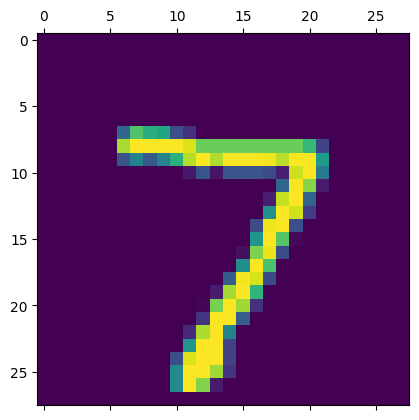

In [38]:
plt.matshow(X_test[0])

In [48]:
y_predicted[0]

array([1.6918202e-05, 1.4663237e-04, 2.0092807e-04, 9.7171521e-01,
       3.8681531e-08, 8.9676600e-05, 1.3442424e-10, 1.0000000e+00,
       3.5557041e-05, 8.0660991e-02], dtype=float32)

In [49]:
np.argmax(y_predicted[0])

7

In [50]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [51]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    0,    1,    1,    1,    2,    1,    1,    1],
       [   0, 1122,    2,    3,    0,    1,    2,    0,    5,    0],
       [   4,    2,  996,   10,    7,    1,    2,    4,    6,    0],
       [   0,    0,    2,  995,    0,    3,    0,    3,    4,    3],
       [   2,    0,    1,    1,  970,    0,    3,    2,    1,    2],
       [   1,    0,    0,   12,    2,  867,    1,    0,    7,    2],
       [   2,    2,    1,    1,    2,    4,  945,    0,    1,    0],
       [   0,    7,    6,    6,    3,    0,    0,  995,    6,    5],
       [   3,    0,    2,   15,    4,    2,    3,    2,  940,    3],
       [   0,    2,    0,    9,   18,    4,    1,    5,    4,  966]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

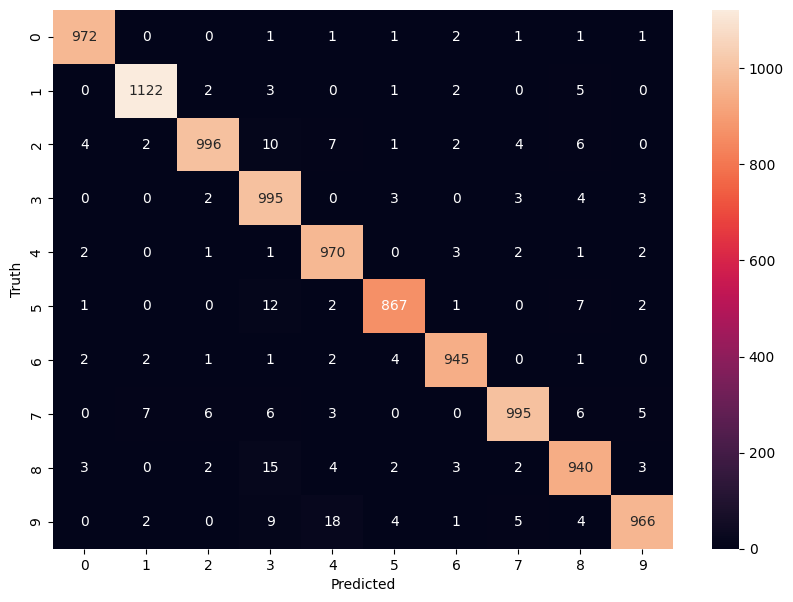

In [52]:
plt.figure(figsize= (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')